# Documentation for the Code Challenges using TiddlyWiki

The primary objective of this notebook is to convert Python code into comprehensive documentation. This documentation will be organized and stored on a webpage using a program called TiddlyWiki.

To achieve this, each Python code snippet will be meticulously converted into a dedicated 'tiddler.' These tiddlers will act as self-contained units of information, each focused on representing a specific Python topic or functionality. Through a seamless integration process, these tiddlers will be incorporated into our TiddlyWiki, enriching its content significantly. As a result, readers and users will have access to a valuable resource that allows them to explore and learn from the various Python concepts and functionalities conveniently. The TiddlyWiki-based documentation will provide an accessible and informative reference for Python enthusiasts and learners alike.

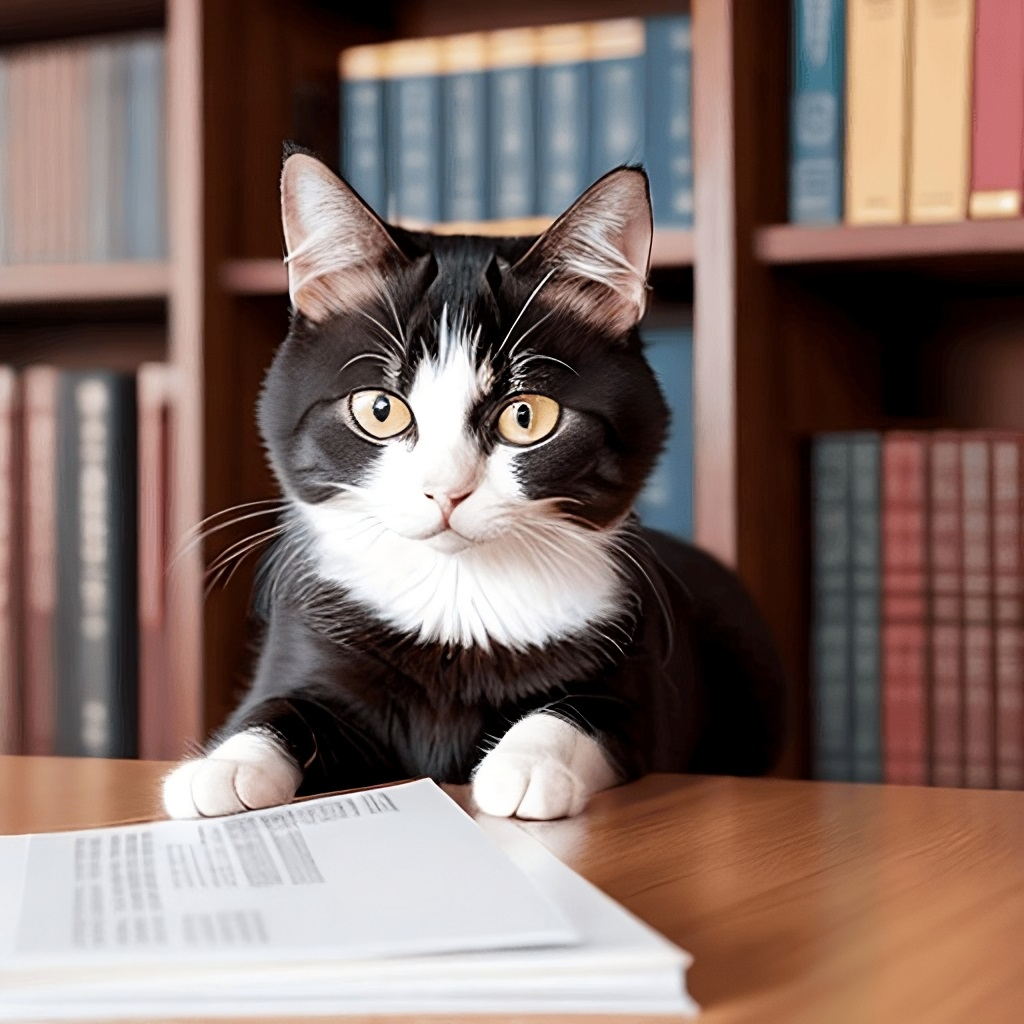

# Leveraging TiddlyWiki for Enhanced Documentation

For this project, TiddlyWiki will be utilized as a unique and non-linear note-taking and personal wiki software. It enables users to efficiently create and organize their information in an interconnected and adaptable manner. Unlike traditional wikis, TiddlyWiki operates as a single HTML file with JavaScript code, making it a self-contained application within a web browser.

The project aims to leverage TiddlyWiki's flexibility for various purposes, such as documenting the code generated in the notebook titled "Automated Solutions for the Challenges." By using TiddlyWiki, the project seeks to provide a powerful tool for effectively organizing information, supporting knowledge management, facilitating project planning, journaling, and enhancing overall creativity and productivity.

## Accessing the Encrypted File to Obtain the API Ke

In [16]:
import os
import openai
import getpass
import base64
import time
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.backends import default_backend

In [14]:
def generate_salt():
    return os.urandom(16)

def generate_fernet_key(password, salt):
    password = password.encode()
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = base64.urlsafe_b64encode(kdf.derive(password))
    return key

def get_decrypted_api_key(password):
    try:
        with open("api_key.enc", "rb") as file:
            encrypted_api_key = file.read()

        with open("salt.bin", "rb") as file:
            salt = file.read()

        # Derive the Fernet key from the password and base64-decode the salt
        key = generate_fernet_key(password, salt)

        cipher_suite = Fernet(key)
        decrypted_api_key = cipher_suite.decrypt(encrypted_api_key).decode()

        return decrypted_api_key
    except FileNotFoundError:
        print("API key file not found.")
        return None
    except Exception as e:
        print("Error occurred while decrypting the API key:", str(e))
        return None

# Prompt user for the password again to decrypt the API key
password_for_decryption = getpass.getpass("Enter your password to decrypt the API key: ")

# Retrieve and decrypt the API key
openai.api_key = get_decrypted_api_key(password_for_decryption)

Enter your password to decrypt the API key: ········


## Transforming Python Code into TiddlyWiki Files

In [25]:

def generate_problem_enunciation(python_code):
    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt=f"Turn the following Python code into a problem enunciation:\n```Python\n{python_code}\n```",
        max_tokens=350,
        n=1
    )
    return response.choices[0].text.strip()

def generate_tiddlers(python_folder_path, tiddlywiki_folder):
    
    if not os.path.exists(tiddlywiki_folder):
        os.makedirs(tiddlywiki_folder)
    
    for filename in os.listdir(python_folder_path):
        if filename.endswith(".py"):
            with open(os.path.join(python_folder_path, filename), 'r') as python_file:
                content = python_file.read()
            python_content = f"```\n{content}\n```"
            problem_enunciation = generate_problem_enunciation(python_content)
            
            tiddler_content = f"{problem_enunciation}\n\n{python_content}"
            tiddler_filename = os.path.splitext(filename)[0] + ".tid"
            tiddler_path = os.path.join(tiddlywiki_folder, tiddler_filename)
            
            with open(tiddler_path, 'w') as tiddler_file:
                tiddler_file.write(tiddler_content)
            time.sleep(23)
    print("TiddlyWiki tiddler files generated successfully!")

current_path = os.getcwd()
python_folder_path = os.path.join(current_path, "code_challenge_solution", "python")
tiddlywiki_folder = os.path.join(current_path, "code_challenge_documentation", "python")
generate_tiddlers(python_folder_path, tiddlywiki_folder)


TiddlyWiki tiddler files generated successfully!


## Transforming JavaScript Code into TiddlyWiki Files

## Transforming Java Code into TiddlyWiki Files

## Transforming C# Code into TiddlyWiki Files

## Transforming C++ Code into TiddlyWiki Files